In [39]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import style
style.use('ggplot')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [40]:
FILE_NAME = '../input/datafill.csv'
START_POINT = '2015/1/1 0:00:00'
source_df = pd.read_csv(FILE_NAME,index_col=0)
index_col = pd.date_range(START_POINT,periods=len(source_df),freq='h')
source_df = pd.DataFrame(np.array(source_df),index=index_col,columns=source_df.columns)
source_df.head(1)

,zhexi_in,xiaoxi_out,lengshuijiang_add,xinhua_add,zhexi_add
2015-01-01,180.475,67.0,0.0,0.0,0.0


In [41]:
#get one year data in 2015
# data_2015 = source_df['2015/1/1 0:00:00':'2016/1/1 0:00:00']
# print(len(data_2015))

/home/harrison/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


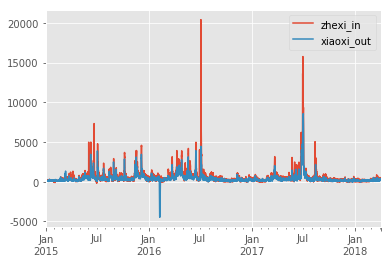

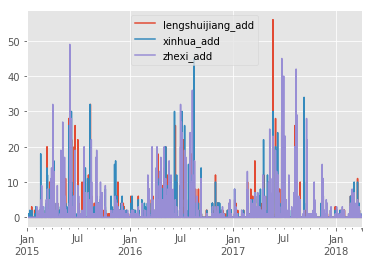

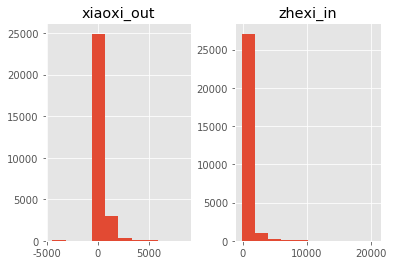

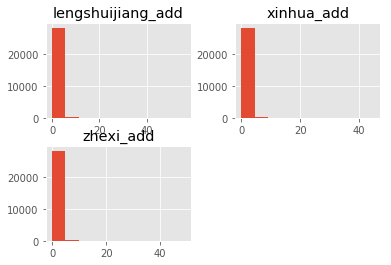

In [42]:
#showing variable curves and histgrams
source_df[['zhexi_in','xiaoxi_out']].plot()
plt.show()
source_df[['lengshuijiang_add','xinhua_add','zhexi_add']].plot()
plt.show()
source_df[['zhexi_in','xiaoxi_out']].hist()
plt.show()
source_df[['lengshuijiang_add','xinhua_add','zhexi_add']].hist()
plt.show()

In [43]:
#replace the negetive number in column 'zhexi_in' with zero
print(source_df[source_df['zhexi_in'] < 0]['zhexi_in'].count())
source_df.ix[source_df['zhexi_in'] < 0,'zhexi_in'] = 0
print(source_df[source_df['zhexi_in'] < 0]['zhexi_in'].count())

print(source_df[source_df['xiaoxi_out'] < 0]['xiaoxi_out'].count())
source_df.ix[source_df['xiaoxi_out'] < 0,'xiaoxi_out'] = 0
print(source_df[source_df['xiaoxi_out'] < 0]['xiaoxi_out'].count())

10
0
93
0


/home/harrison/anaconda3/envs/tpot/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
/home/harrison/anaconda3/envs/tpot/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  import sys


In [44]:
source_df['zhexi_in_day_avg'] = source_df[['zhexi_in']].rolling(window=24).mean()
source_df['xiaoxi_out_day_avg'] = source_df[['xiaoxi_out']].rolling(window=24).mean()
source_df['lengshuijiang_add_day_rainfall_total'] = source_df[['lengshuijiang_add']].rolling(window=24).sum()
source_df['xinhua_add_add_day_rainfall_total'] = source_df[['xinhua_add']].rolling(window=24).sum()
source_df['zhexi_add_day_rainfall_total'] = source_df[['zhexi_add']].rolling(window=24).sum()

In [45]:
source_df = source_df.dropna()
source_df

,zhexi_in,xiaoxi_out,lengshuijiang_add,xinhua_add,zhexi_add,zhexi_in_day_avg,xiaoxi_out_day_avg,lengshuijiang_add_day_rainfall_total,xinhua_add_add_day_rainfall_total,zhexi_add_day_rainfall_total
2015-01-01 23:00:00,127.582,198.00,0.0,0.0,0.0,155.391583,118.333333,0.0,0.0,0.0
2015-01-02 00:00:00,145.932,177.00,0.0,0.0,0.0,153.952292,122.916667,0.0,0.0,0.0
2015-01-02 01:00:00,135.259,68.00,0.0,0.0,0.0,150.978333,123.041667,0.0,0.0,0.0
2015-01-02 02:00:00,113.138,68.00,0.0,0.0,0.0,147.327500,123.125000,0.0,0.0,0.0
2015-01-02 03:00:00,146.560,68.00,0.0,0.0,0.0,145.785625,123.208333,0.0,0.0,0.0
2015-01-02 04:00:00,156.628,68.00,0.0,0.0,0.0,145.315542,123.291667,0.0,0.0,0.0
2015-01-02 05:00:00,140.187,68.00,0.0,0.0,0.0,143.683750,123.416667,0.0,0.0,0.0
2015-01-02 06:00:00,144.081,68.00,0.0,0.0,0.0,142.916250,123.500000,0.0,0.0,0.0
2015-01-02 07:00:00,176.073,68.00,0.0,0.0,0.0,144.069625,123.625000,0.0,0.0,0.0
2015-01-02 08:00:00,203.661,69.00,0.0,0.0,0.0,145.444708,123.750000,0.0,0.0,0.0


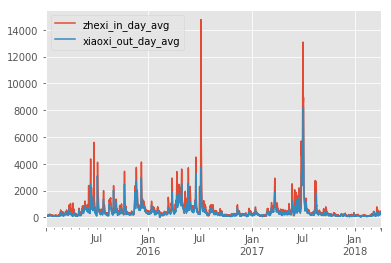

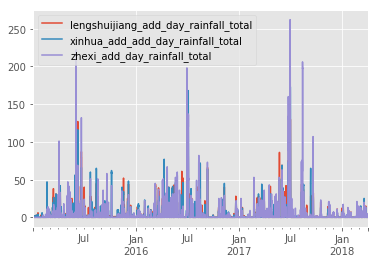

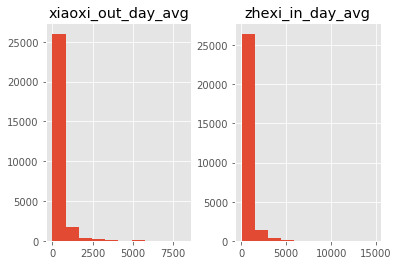

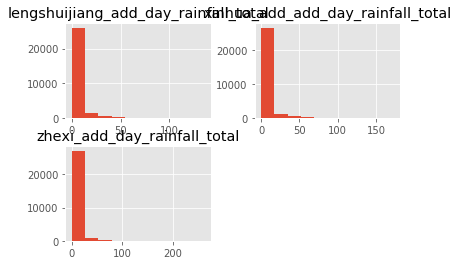

In [46]:
source_df[['zhexi_in_day_avg','xiaoxi_out_day_avg']].plot()
plt.show()
source_df[['lengshuijiang_add_day_rainfall_total','xinhua_add_add_day_rainfall_total','zhexi_add_day_rainfall_total']].plot()
plt.show()
source_df[['zhexi_in_day_avg','xiaoxi_out_day_avg']].hist()
plt.show()
source_df[['lengshuijiang_add_day_rainfall_total','xinhua_add_add_day_rainfall_total','zhexi_add_day_rainfall_total']].hist()
plt.show()

In [47]:
def rainfall_level_determination(rainfall):
    if rainfall < 0.0:
        return -1;
    elif rainfall < 10.0:  #小雨
        return 'level1';
    elif rainfall < 25.0:  #中雨
        return 'level2';
    elif rainfall < 50.0:  #大雨
        return 'level3';
    elif rainfall < 100.0: #暴雨
        return 'level4';
    elif rainfall < 250.0: #大暴雨
        return 'level5';
    else:                  #特大暴雨
        return 'level6';

In [48]:
for record_index in list(source_df.index):
    source_df.ix[record_index,'lengshuijiang_add_level'] = rainfall_level_determination(
        source_df.ix[record_index,'lengshuijiang_add_day_rainfall_total'])
    source_df.ix[record_index,'xinhua_add_level'] = rainfall_level_determination(
        source_df.ix[record_index,'xinhua_add_add_day_rainfall_total'])
    source_df.ix[record_index,'zhexi_add_level'] = rainfall_level_determination(
        source_df.ix[record_index,'zhexi_add_day_rainfall_total'])

/home/harrison/anaconda3/envs/tpot/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
/home/harrison/anaconda3/envs/tpot/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """
/home/harrison/anaconda3/envs/tpot/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/us

In [52]:
#divide whole set into train_set and test_set, Assume that the data point in the testset is unknown
TRAIN_TEST_SPLIT_POINT = '2017-01-01 00:00:00'
source_df = pd.get_dummies(source_df)
train_set = source_df[:TRAIN_TEST_SPLIT_POINT]
test_set = source_df[TRAIN_TEST_SPLIT_POINT:]
# data_2015.to_csv('../input/data_2015.csv')
# data_2015_train.to_csv('../input/data_2015_train.csv')
# data_2015_test.to_csv('../input/data_2015_test.csv')
source_df

,zhexi_in,xiaoxi_out,lengshuijiang_add,xinhua_add,zhexi_add,zhexi_in_day_avg,xiaoxi_out_day_avg,lengshuijiang_add_day_rainfall_total,xinhua_add_add_day_rainfall_total,zhexi_add_day_rainfall_total,...,xinhua_add_level_level2,xinhua_add_level_level3,xinhua_add_level_level4,xinhua_add_level_level5,zhexi_add_level_level1,zhexi_add_level_level2,zhexi_add_level_level3,zhexi_add_level_level4,zhexi_add_level_level5,zhexi_add_level_level6
2015-01-01 23:00:00,127.582,198.00,0.0,0.0,0.0,155.391583,118.333333,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
2015-01-02 00:00:00,145.932,177.00,0.0,0.0,0.0,153.952292,122.916667,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
2015-01-02 01:00:00,135.259,68.00,0.0,0.0,0.0,150.978333,123.041667,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
2015-01-02 02:00:00,113.138,68.00,0.0,0.0,0.0,147.327500,123.125000,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
2015-01-02 03:00:00,146.560,68.00,0.0,0.0,0.0,145.785625,123.208333,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
2015-01-02 04:00:00,156.628,68.00,0.0,0.0,0.0,145.315542,123.291667,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
2015-01-02 05:00:00,140.187,68.00,0.0,0.0,0.0,143.683750,123.416667,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
2015-01-02 06:00:00,144.081,68.00,0.0,0.0,0.0,142.916250,123.500000,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
2015-01-02 07:00:00,176.073,68.00,0.0,0.0,0.0,144.069625,123.625000,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
2015-01-02 08:00:00,203.661,69.00,0.0,0.0,0.0,145.444708,123.750000,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0


In [50]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
def scale_data(data,scaler,is_log1p=False,is_train=True):
    scale_columns = data.columns[0:10]
    data_ = None
    if(is_train): 
        if(is_log1p):
            data_ = np.log1p(data[scale_columns])
        if(data_ is None):
            data_ = scaler.fit_transform(data[scale_columns])
        else:
            data_ = scaler.fit_transform(data_)
    else:
        if(is_log1p):
            data_ = np.log1p(data[scale_columns])
        if(data_ is None):
            data_ = scaler.transform(data[scale_columns])
        else:
            data_ = scaler.transform(data_)
    data_ = np.hstack((data_,np.array(data[data.columns[10:]])))
    data_ = pd.DataFrame(data_,columns=data.columns,index=data.index)
    data_[data.columns[10:]] =  data_[data.columns[10:]].astype(int)
    return data_,scaler
# data_2015_standard_with_log1p,scaler_standard_with_log1p = scale_data(data_2015_train,StandardScaler(),is_log1p=True)
# data_2015_min_max_with_log1p,scaler_min_max_with_log1p = scale_data(data_2015_train,MinMaxScaler(),is_log1p=True)
# data_2015_standard_without_log1p,scaler_standard_without_log1p = scale_data(data_2015_train,StandardScaler(),is_log1p=False)
# data_2015_min_max_without_log1p,scaler_min_max_without_log1p = scale_data(data_2015_train,MinMaxScaler(),is_log1p=False)

In [21]:
# data_2015_standard_with_log1p[data_2015_standard_with_log1p.columns[:2]].hist()
# data_2015_standard_with_log1p[data_2015_standard_with_log1p.columns[5:7]].hist()

In [22]:
# data_2015_standard_with_log1p.to_csv('input/train/2015_train_standard_log1p.csv')
# data_2015_standard_without_log1p.to_csv('input/train/2015_train_standard.csv')
# data_2015_min_max_with_log1p.to_csv('input/train/2015_train_minmax_log1p.csv')
# data_2015_min_max_without_log1p.to_csv('input/train/2015_train_minmax.csv')

In [63]:
scaler.data_max_,scaler.data_min_

(array([20400.        ,  4451.38      ,    46.        ,    45.        ,
           49.        , 14754.70829167,  3737.39375   ,   127.        ,
          168.        ,   222.        ]),
 array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        41.03208333,  0.        ,  0.        ,  0.        ,  0.        ]))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f199760ee10>,
      dtype=object)

/home/harrison/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


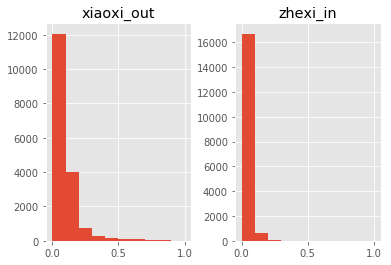

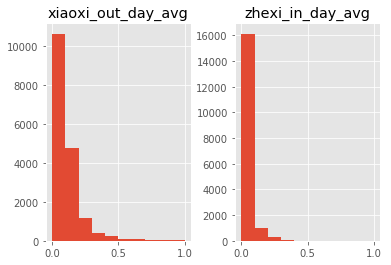

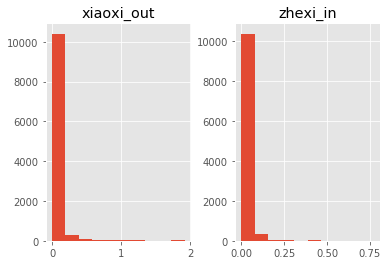

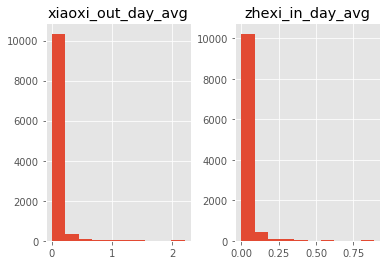

In [53]:
train_set, scaler = scale_data(train_set,MinMaxScaler(),is_log1p=False,is_train=True)
test_set,_ = scale_data(test_set,scaler,is_log1p=False,is_train=False)
train_set[train_set.columns[:2]].hist()
train_set[train_set.columns[5:7]].hist()
test_set[test_set.columns[:2]].hist()
test_set[test_set.columns[5:7]].hist()

#there are some outlier points, replace then with mean value
outlier_points_info = []
for line in [i/10.0 for i in range(15,45,1)]:
    outlier_points_line = line
    in_outlier_points = data_2015_standard[np.abs(data_2015_standard['zhexi_in']) > np.abs(outlier_points_line)]['zhexi_in'].count()
    out_outlier_points = data_2015_standard[np.abs(data_2015_standard['xiaoxi_out']) > np.abs(outlier_points_line)]['xiaoxi_out'].count()
    outlier_points_info.append([line,in_outlier_points,out_outlier_points])
    #print(f'line {-line} {line}')
    #print(f'in_outlier_points:{in_outlier_points} out_outlier_points{out_outlier_points}')
outlier_points_info_df = pd.DataFrame(outlier_points_info,columns=('line','in_outlier_points','out_outlier_points'))
outlier_points_info_df.head(15)

In [30]:
# _data_2015_standard_with_log1p,scaler_standard_with_log1p = scale_data(data_2015_test,scaler_standard_with_log1p,is_log1p=True,is_train=False)
# _data_2015_min_max_with_log1p,scaler_min_max_with_log1p = scale_data(data_2015_test,scaler_min_max_with_log1p,is_log1p=True,is_train=False)
# _data_2015_standard_without_log1p,scaler_standard_without_log1p = scale_data(data_2015_test,scaler_standard_without_log1p,is_log1p=False,is_train=False)
# _data_2015_min_max_without_log1p,scaler_min_max_without_log1p = scale_data(data_2015_test,scaler_min_max_without_log1p,is_log1p=False,is_train=False)
# _data_2015_standard_with_log1p.to_csv('input/test/2015_test_standard_log1p.csv')
# _data_2015_standard_without_log1p.to_csv('input/test/2015_test_standard.csv')
# _data_2015_min_max_with_log1p.to_csv('input/test/2015_test_minmax_log1p.csv')
# _data_2015_min_max_without_log1p.to_csv('input/test/2015_test_minmax.csv')

In [31]:
# data_2015_minmax_log1p = pd.concat((data_2015_min_max_with_log1p,_data_2015_min_max_with_log1p))
# data_2015_minmax = pd.concat((data_2015_min_max_without_log1p,_data_2015_min_max_without_log1p))
# data_2015_standard_log1p = pd.concat((data_2015_standard_with_log1p,_data_2015_standard_with_log1p))
# data_2015_standard = pd.concat((data_2015_standard_without_log1p,_data_2015_standard_without_log1p))
# data_2015_minmax_log1p.to_csv('input/data_2015_minmax_log1p.csv')
# data_2015_minmax.to_csv('input/data_2015_minmax.csv')
# data_2015_standard_log1p.to_csv('input/data_2015_standard_log1p.csv')
# data_2015_standard.to_csv('input/data_2015_standard.csv')

In [54]:
def create_shift_features(data,shift_columns,offsets,periods):
    for i in range(1,len(shift_columns)+1):
        column,offset,period = shift_columns[i-1],offsets[i-1],periods[i-1]
        for j in range(1,period+1):
            data[f'{column}_shift{offset}_{j}'] = data[column].shift((offset+j))
    return data

In [57]:
columns = ['xiaoxi_out','xiaoxi_out_day_avg','zhexi_in','zhexi_in_day_avg']
offsets=[0,0,48,48]
periods=[12,12,12,12]
train_set = create_shift_features(train_set,shift_columns=columns,offsets=offsets,periods=periods)

In [58]:
#show the correlation to label
train_set = train_set.dropna()
train_set.corrwith(train_set['zhexi_in']).abs().sort_values(ascending=False).head(60)

zhexi_in                                1.000000
zhexi_in_day_avg                        0.870507
xiaoxi_out_shift0_7                     0.834676
xiaoxi_out_shift0_8                     0.834561
xiaoxi_out_shift0_6                     0.832768
xiaoxi_out_shift0_9                     0.832448
xiaoxi_out_day_avg                      0.831157
xiaoxi_out_shift0_5                     0.829390
xiaoxi_out_shift0_10                    0.828224
xiaoxi_out_day_avg_shift0_1             0.825076
xiaoxi_out_shift0_4                     0.824797
xiaoxi_out_shift0_11                    0.822043
xiaoxi_out_shift0_3                     0.819320
xiaoxi_out_day_avg_shift0_2             0.818015
xiaoxi_out_shift0_12                    0.814165
xiaoxi_out_shift0_2                     0.813051
xiaoxi_out_day_avg_shift0_3             0.810008
xiaoxi_out_shift0_1                     0.805932
xiaoxi_out_day_avg_shift0_4             0.801099
xiaoxi_out                              0.798228
xiaoxi_out_day_avg_s

In [59]:
test_set = create_shift_features(test_set,shift_columns=columns,offsets=offsets,periods=periods)
test_set = test_set.dropna()
test_set

,zhexi_in,xiaoxi_out,lengshuijiang_add,xinhua_add,zhexi_add,zhexi_in_day_avg,xiaoxi_out_day_avg,lengshuijiang_add_day_rainfall_total,xinhua_add_add_day_rainfall_total,zhexi_add_day_rainfall_total,...,zhexi_in_day_avg_shift48_3,zhexi_in_day_avg_shift48_4,zhexi_in_day_avg_shift48_5,zhexi_in_day_avg_shift48_6,zhexi_in_day_avg_shift48_7,zhexi_in_day_avg_shift48_8,zhexi_in_day_avg_shift48_9,zhexi_in_day_avg_shift48_10,zhexi_in_day_avg_shift48_11,zhexi_in_day_avg_shift48_12
2017-01-03 12:00:00,0.011979,0.045656,0.0,0.0,0.0,0.010183,0.028130,0.0,0.0,0.0,...,0.010896,0.010748,0.010552,0.010830,0.010670,0.010391,0.010716,0.011072,0.011602,0.011774
2017-01-03 13:00:00,0.012050,0.046940,0.0,0.0,0.0,0.010509,0.028170,0.0,0.0,0.0,...,0.011326,0.010896,0.010748,0.010552,0.010830,0.010670,0.010391,0.010716,0.011072,0.011602
2017-01-03 14:00:00,0.011568,0.047075,0.0,0.0,0.0,0.010817,0.029755,0.0,0.0,0.0,...,0.011457,0.011326,0.010896,0.010748,0.010552,0.010830,0.010670,0.010391,0.010716,0.011072
2017-01-03 15:00:00,0.008439,0.047089,0.0,0.0,0.0,0.010730,0.031337,0.0,0.0,0.0,...,0.011659,0.011457,0.011326,0.010896,0.010748,0.010552,0.010830,0.010670,0.010391,0.010716
2017-01-03 16:00:00,0.011666,0.047156,0.0,0.0,0.0,0.010598,0.032920,0.0,0.0,0.0,...,0.012424,0.011659,0.011457,0.011326,0.010896,0.010748,0.010552,0.010830,0.010670,0.010391
2017-01-03 17:00:00,0.011714,0.047125,0.0,0.0,0.0,0.010447,0.034501,0.0,0.0,0.0,...,0.013218,0.012424,0.011659,0.011457,0.011326,0.010896,0.010748,0.010552,0.010830,0.010670
2017-01-03 18:00:00,0.017422,0.047145,0.0,0.0,0.0,0.010676,0.036083,0.0,0.0,0.0,...,0.014198,0.013218,0.012424,0.011659,0.011457,0.011326,0.010896,0.010748,0.010552,0.010830
2017-01-03 19:00:00,0.013183,0.047242,0.0,0.0,0.0,0.010790,0.037673,0.0,0.0,0.0,...,0.014619,0.014198,0.013218,0.012424,0.011659,0.011457,0.011326,0.010896,0.010748,0.010552
2017-01-03 20:00:00,0.015436,0.047199,0.0,0.0,0.0,0.010958,0.039261,0.0,0.0,0.0,...,0.015052,0.014619,0.014198,0.013218,0.012424,0.011659,0.011457,0.011326,0.010896,0.010748
2017-01-03 21:00:00,0.014173,0.037447,0.0,0.0,0.0,0.011367,0.040299,0.0,0.0,0.0,...,0.015501,0.015052,0.014619,0.014198,0.013218,0.012424,0.011659,0.011457,0.011326,0.010896


In [60]:
def save_train_test_files():
    train_set.to_csv(f'../input/train/{TRAIN_TEST_SPLIT_POINT}.csv')
    test_set.to_csv(f'../input/test/{TRAIN_TEST_SPLIT_POINT}.csv')
save_train_test_files()

In [28]:
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm.sklearn import LGBMRegressor
import gbdtpl

In [31]:
train_set = train_set_with_minmax_scaled[:'2015-11-01 23:00:00']
test_set = train_set_with_minmax_scaled['2015-11-02 0:00:00':]
from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge
train_x,test_x,train_y,test_y = train_test_split(np.array(train_set[train_set.columns[1:]]),np.array(train_set[train_set.columns[0]]),test_size=0.2,random_state=20)
reg_br = BayesianRidge()
reg_xgb = XGBRegressor(objective="reg:squarederror")
reg_lgb = LGBMRegressor()
reg_cat = CatBoostRegressor()

In [32]:
reg_br.fit(train_x,train_y)
reg_xgb.fit(train_x,train_y)
reg_lgb.fit(train_x,train_y)
reg_cat.fit(train_x,train_y)

0:	learn: 0.6605398	total: 67.5ms	remaining: 1m 7s
1:	learn: 0.6410738	total: 88.4ms	remaining: 44.1s
2:	learn: 0.6222203	total: 109ms	remaining: 36.3s
3:	learn: 0.6038767	total: 129ms	remaining: 32.1s
4:	learn: 0.5862370	total: 150ms	remaining: 29.9s
5:	learn: 0.5690348	total: 172ms	remaining: 28.5s
6:	learn: 0.5523950	total: 199ms	remaining: 28.2s
7:	learn: 0.5361144	total: 221ms	remaining: 27.4s
8:	learn: 0.5204189	total: 247ms	remaining: 27.2s
9:	learn: 0.5050894	total: 270ms	remaining: 26.8s
10:	learn: 0.4903041	total: 295ms	remaining: 26.6s
11:	learn: 0.4759114	total: 318ms	remaining: 26.1s
12:	learn: 0.4619528	total: 341ms	remaining: 25.9s
13:	learn: 0.4484106	total: 363ms	remaining: 25.6s
14:	learn: 0.4352979	total: 384ms	remaining: 25.2s
15:	learn: 0.4226139	total: 405ms	remaining: 24.9s
16:	learn: 0.4102460	total: 424ms	remaining: 24.5s
17:	learn: 0.3982461	total: 444ms	remaining: 24.2s
18:	learn: 0.3866445	total: 464ms	remaining: 24s
19:	learn: 0.3754035	total: 485ms	remaini

168:	learn: 0.0389454	total: 3.66s	remaining: 18s
169:	learn: 0.0388987	total: 3.68s	remaining: 18s
170:	learn: 0.0388117	total: 3.7s	remaining: 18s
171:	learn: 0.0387090	total: 3.73s	remaining: 17.9s
172:	learn: 0.0386175	total: 3.75s	remaining: 17.9s
173:	learn: 0.0385614	total: 3.77s	remaining: 17.9s
174:	learn: 0.0384657	total: 3.79s	remaining: 17.9s
175:	learn: 0.0384132	total: 3.81s	remaining: 17.8s
176:	learn: 0.0383110	total: 3.83s	remaining: 17.8s
177:	learn: 0.0382462	total: 3.85s	remaining: 17.8s
178:	learn: 0.0381584	total: 3.87s	remaining: 17.8s
179:	learn: 0.0380974	total: 3.89s	remaining: 17.7s
180:	learn: 0.0380273	total: 3.91s	remaining: 17.7s
181:	learn: 0.0379440	total: 3.93s	remaining: 17.7s
182:	learn: 0.0379105	total: 3.95s	remaining: 17.6s
183:	learn: 0.0378428	total: 3.97s	remaining: 17.6s
184:	learn: 0.0378126	total: 3.99s	remaining: 17.6s
185:	learn: 0.0377219	total: 4.01s	remaining: 17.6s
186:	learn: 0.0376989	total: 4.03s	remaining: 17.5s
187:	learn: 0.03760

337:	learn: 0.0336077	total: 7.26s	remaining: 14.2s
338:	learn: 0.0335963	total: 7.28s	remaining: 14.2s
339:	learn: 0.0335847	total: 7.32s	remaining: 14.2s
340:	learn: 0.0335704	total: 7.34s	remaining: 14.2s
341:	learn: 0.0335544	total: 7.36s	remaining: 14.2s
342:	learn: 0.0335441	total: 7.38s	remaining: 14.1s
343:	learn: 0.0335303	total: 7.41s	remaining: 14.1s
344:	learn: 0.0335283	total: 7.43s	remaining: 14.1s
345:	learn: 0.0335185	total: 7.46s	remaining: 14.1s
346:	learn: 0.0335126	total: 7.48s	remaining: 14.1s
347:	learn: 0.0335034	total: 7.5s	remaining: 14.1s
348:	learn: 0.0335033	total: 7.51s	remaining: 14s
349:	learn: 0.0335027	total: 7.53s	remaining: 14s
350:	learn: 0.0334982	total: 7.55s	remaining: 14s
351:	learn: 0.0334669	total: 7.57s	remaining: 13.9s
352:	learn: 0.0334454	total: 7.59s	remaining: 13.9s
353:	learn: 0.0334394	total: 7.62s	remaining: 13.9s
354:	learn: 0.0334394	total: 7.62s	remaining: 13.8s
355:	learn: 0.0334061	total: 7.64s	remaining: 13.8s
356:	learn: 0.03338

497:	learn: 0.0314756	total: 10.6s	remaining: 10.7s
498:	learn: 0.0314557	total: 10.6s	remaining: 10.7s
499:	learn: 0.0314502	total: 10.6s	remaining: 10.6s
500:	learn: 0.0314501	total: 10.7s	remaining: 10.6s
501:	learn: 0.0314428	total: 10.7s	remaining: 10.6s
502:	learn: 0.0314092	total: 10.7s	remaining: 10.6s
503:	learn: 0.0314022	total: 10.7s	remaining: 10.5s
504:	learn: 0.0313997	total: 10.7s	remaining: 10.5s
505:	learn: 0.0313989	total: 10.8s	remaining: 10.5s
506:	learn: 0.0313936	total: 10.8s	remaining: 10.5s
507:	learn: 0.0313801	total: 10.8s	remaining: 10.5s
508:	learn: 0.0313680	total: 10.8s	remaining: 10.4s
509:	learn: 0.0313519	total: 10.8s	remaining: 10.4s
510:	learn: 0.0313499	total: 10.9s	remaining: 10.4s
511:	learn: 0.0313427	total: 10.9s	remaining: 10.4s
512:	learn: 0.0313383	total: 10.9s	remaining: 10.3s
513:	learn: 0.0313378	total: 10.9s	remaining: 10.3s
514:	learn: 0.0313073	total: 10.9s	remaining: 10.3s
515:	learn: 0.0312992	total: 11s	remaining: 10.3s
516:	learn: 0.

658:	learn: 0.0301031	total: 14s	remaining: 7.23s
659:	learn: 0.0301003	total: 14s	remaining: 7.21s
660:	learn: 0.0300999	total: 14s	remaining: 7.19s
661:	learn: 0.0300917	total: 14s	remaining: 7.17s
662:	learn: 0.0300897	total: 14.1s	remaining: 7.15s
663:	learn: 0.0300846	total: 14.1s	remaining: 7.12s
664:	learn: 0.0300716	total: 14.1s	remaining: 7.1s
665:	learn: 0.0300688	total: 14.1s	remaining: 7.08s
666:	learn: 0.0300639	total: 14.1s	remaining: 7.06s
667:	learn: 0.0300529	total: 14.2s	remaining: 7.04s
668:	learn: 0.0300400	total: 14.2s	remaining: 7.02s
669:	learn: 0.0300340	total: 14.2s	remaining: 7s
670:	learn: 0.0300310	total: 14.2s	remaining: 6.97s
671:	learn: 0.0300069	total: 14.2s	remaining: 6.95s
672:	learn: 0.0300068	total: 14.3s	remaining: 6.93s
673:	learn: 0.0300067	total: 14.3s	remaining: 6.91s
674:	learn: 0.0300060	total: 14.3s	remaining: 6.89s
675:	learn: 0.0300017	total: 14.3s	remaining: 6.87s
676:	learn: 0.0299953	total: 14.4s	remaining: 6.85s
677:	learn: 0.0299852	to

817:	learn: 0.0288400	total: 17.3s	remaining: 3.86s
818:	learn: 0.0288395	total: 17.4s	remaining: 3.83s
819:	learn: 0.0288394	total: 17.4s	remaining: 3.81s
820:	learn: 0.0287979	total: 17.4s	remaining: 3.79s
821:	learn: 0.0287978	total: 17.4s	remaining: 3.77s
822:	learn: 0.0287956	total: 17.4s	remaining: 3.75s
823:	learn: 0.0287952	total: 17.5s	remaining: 3.73s
824:	learn: 0.0287888	total: 17.5s	remaining: 3.71s
825:	learn: 0.0287833	total: 17.5s	remaining: 3.69s
826:	learn: 0.0287814	total: 17.5s	remaining: 3.67s
827:	learn: 0.0287806	total: 17.5s	remaining: 3.64s
828:	learn: 0.0287762	total: 17.6s	remaining: 3.62s
829:	learn: 0.0287701	total: 17.6s	remaining: 3.6s
830:	learn: 0.0287615	total: 17.6s	remaining: 3.58s
831:	learn: 0.0287578	total: 17.6s	remaining: 3.56s
832:	learn: 0.0287576	total: 17.6s	remaining: 3.54s
833:	learn: 0.0287393	total: 17.7s	remaining: 3.52s
834:	learn: 0.0287282	total: 17.7s	remaining: 3.5s
835:	learn: 0.0287270	total: 17.7s	remaining: 3.48s
836:	learn: 0.

986:	learn: 0.0278509	total: 20.9s	remaining: 275ms
987:	learn: 0.0278451	total: 20.9s	remaining: 254ms
988:	learn: 0.0278224	total: 20.9s	remaining: 233ms
989:	learn: 0.0278213	total: 20.9s	remaining: 212ms
990:	learn: 0.0278193	total: 21s	remaining: 190ms
991:	learn: 0.0278116	total: 21s	remaining: 169ms
992:	learn: 0.0278099	total: 21s	remaining: 148ms
993:	learn: 0.0278064	total: 21s	remaining: 127ms
994:	learn: 0.0278034	total: 21.1s	remaining: 106ms
995:	learn: 0.0277995	total: 21.1s	remaining: 84.7ms
996:	learn: 0.0277942	total: 21.1s	remaining: 63.5ms
997:	learn: 0.0277942	total: 21.1s	remaining: 42.3ms
998:	learn: 0.0277941	total: 21.1s	remaining: 21.2ms
999:	learn: 0.0277920	total: 21.2s	remaining: 0us


In [33]:
from sklearn.metrics import mean_squared_error
def plot_result(reg,x,y):
    y_hat = reg.predict(x)
    mse = mean_squared_error(y_hat,y)
    plt.plot(y_hat)
    plt.plot(y)
    plt.title(mse)
    plt.show()

/home/harrison/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


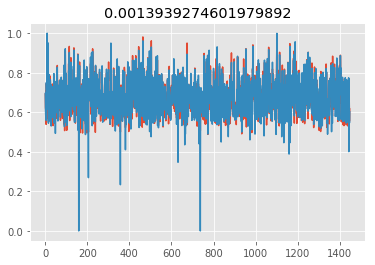

/home/harrison/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


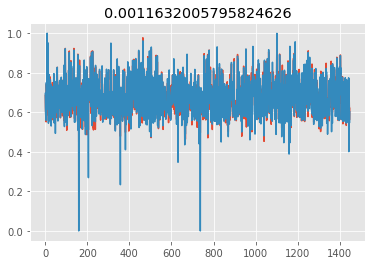

/home/harrison/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


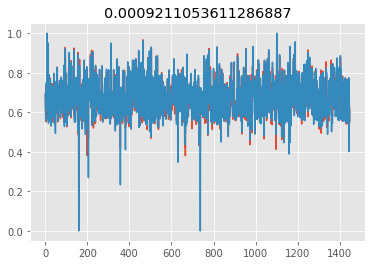

/home/harrison/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


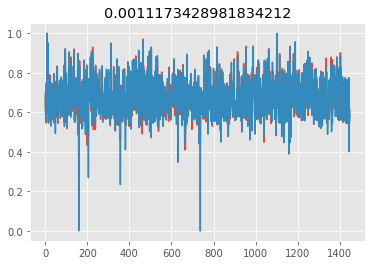

In [34]:
plot_result(reg_br,test_x,test_y)
plot_result(reg_xgb,test_x,test_y)
plot_result(reg_lgb,test_x,test_y)
plot_result(reg_cat,test_x,test_y)

/home/harrison/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


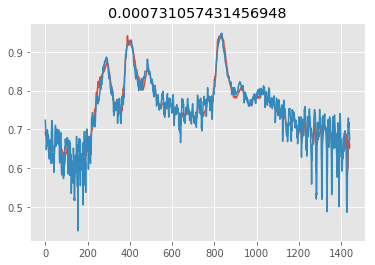

/home/harrison/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


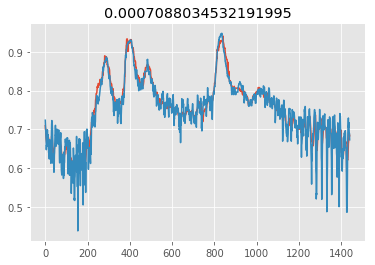

/home/harrison/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


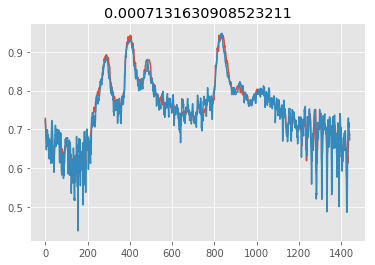

/home/harrison/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


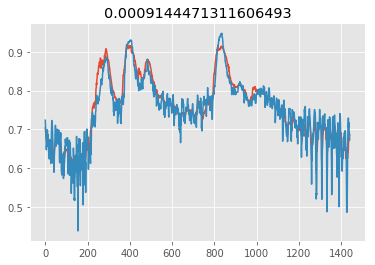

In [35]:
plot_result(reg_br,np.array(test_set[test_set.columns[1:]]),np.array(test_set[test_set.columns[0]]))
plot_result(reg_xgb,np.array(test_set[test_set.columns[1:]]),np.array(test_set[test_set.columns[0]]))
plot_result(reg_lgb,np.array(test_set[test_set.columns[1:]]),np.array(test_set[test_set.columns[0]]))
plot_result(reg_cat,np.array(test_set[test_set.columns[1:]]),np.array(test_set[test_set.columns[0]]))

In [3]:
'''
from robo.fmin import random_search,bayesian_optimization
data = data_2015_minmax_log1p_dropna
reg = XGBRegressor(objective='reg:squarederror')
def objective_func(x):
    data_ = create_shift_features(data,shift_columns=columns,
                          offsets=[0,0,int(x[0]),int(x[0])],
                          periods=[int(x[1]),int(x[1]),int(x[2]),int(x[2])])
    train_set = data_[:'2015-11-01 23:00:00']
    train_x,test_x,train_y,test_y = train_test_split(np.array(train_set[train_set.columns[1:]]),np.array(train_set[train_set.columns[0]]),test_size=0.2,random_state=20)
    reg.fit(train_x,train_y)
    y_hat = reg.predict(test_x)
    return mean_squared_error(y_hat,test_y)
def opt():
    result = bayesian_optimization(objective_function=objective_func,
                                   lower=np.array([20,5,5]),upper=np.array([60,20,20]))
    return result
'''
opt()

"\nfrom robo.fmin import random_search,bayesian_optimization\ndata = data_2015_minmax_log1p_dropna\nreg = XGBRegressor(objective='reg:squarederror')\ndef objective_func(x):\n    data_ = create_shift_features(data,shift_columns=columns,\n                          offsets=[0,0,int(x[0]),int(x[0])],\n                          periods=[int(x[1]),int(x[1]),int(x[2]),int(x[2])])\n    train_set = data_[:'2015-11-01 23:00:00']\n    train_x,test_x,train_y,test_y = train_test_split(np.array(train_set[train_set.columns[1:]]),np.array(train_set[train_set.columns[0]]),test_size=0.2,random_state=20)\n    reg.fit(train_x,train_y)\n    y_hat = reg.predict(test_x)\n    return mean_squared_error(y_hat,test_y)\ndef opt():\n    result = bayesian_optimization(objective_function=objective_func,\n                                   lower=np.array([20,5,5]),upper=np.array([60,20,20]))\n    return result\n"

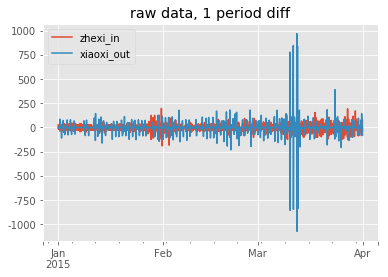

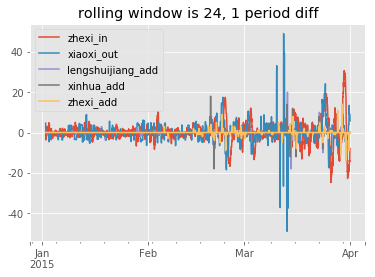

In [6]:
data_2015_spring.diff(1)[['zhexi_in','xiaoxi_out']].plot()
plt.title('raw data, 1 period diff')
plt.show()
data_2015_spring_rolling_24_diff1 = data_2015_spring_rolling_24.diff(1).dropna()
data_2015_spring_rolling_24_diff1.plot()
plt.title('rolling window is 24, 1 period diff')
plt.show()

In [10]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [11]:
zhexi_in_df = data_2015_spring_rolling_24['zhexi_in']
train = zhexi_in_df['2015/1/1 23:00:00':'2015/3/15 0:00:00']
test = zhexi_in_df['2015/3/15 1:00:00':'2015/3/31 23:00:00']

/home/harrison/anaconda3/envs/tpot/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


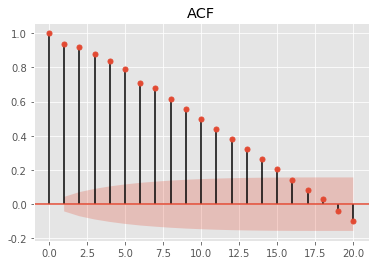

In [12]:
acf = plot_acf(data_2015_spring_rolling_24_diff1['zhexi_in'],lags=20)
plt.title('ACF')
acf.show()

/home/harrison/anaconda3/envs/tpot/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


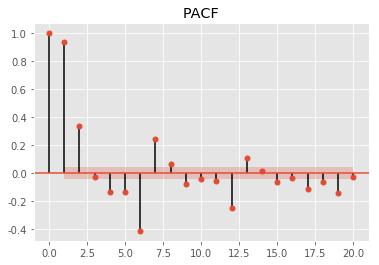

In [13]:
pacf = plot_pacf(data_2015_spring_rolling_24_diff1['zhexi_in'],lags=20)
plt.title('PACF')
pacf.show()

In [14]:
#model = ARIMA(train,order=(15,1,3),freq='h')

In [15]:
#result = model.fit()

In [16]:
#pred = result.predict('2015/3/15 1:00:00','2015/3/15 1:00:00',dynamic=True,typ='levels')

In [ ]:
steps = 5
preds = []
train_temp = train
for index in test.index[:24]:
    model = ARIMA(train_temp,order=(15,1,3),freq='h')
    result = model.fit()
    pred = result.predict(index,index,dynamic=True,typ='levels')
    preds.append(pred.values[0])
    train_temp = pd.concat((train_temp,pred))

In [ ]:
plt.plot(preds)
test['2015/3/15 1:00:00':'2015/3/16 0:00:00'].plot()
#test.plot()

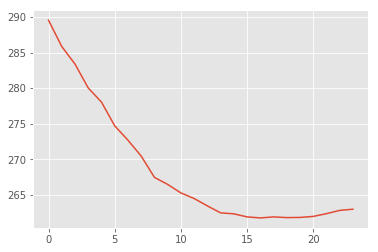

In [111]:
plt.plot(preds)

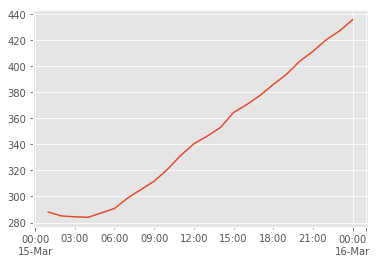

In [112]:
test['2015/3/15 1:00:00':'2015/3/16 0:00:00'].plot()